In [1]:
# Impor library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib

In [2]:
# Impor df
df = pd.read_csv('datasets/clean.csv')
df['weight'] = df['weight'].round(decimals = 1)
df['height'] = df['height'].round(decimals = 1)

In [3]:
values = ['Male']
df1 = df[df.gender.isin(values) == True]
df2 = df[df.gender.isin(values) == False]

In [4]:
df1.head()

,gender,weight,height
0,Male,73.8,241.9
1,Male,68.8,162.3
2,Male,74.1,212.7
3,Male,71.7,220.0
4,Male,69.9,206.4


In [5]:
df2.head()

,gender,weight,height
5000,Female,58.9,102.1
5001,Female,65.2,141.3
5002,Female,63.4,131.0
5003,Female,64.5,128.2
5004,Female,61.8,129.8


In [6]:
X1 = df1.iloc[:, 2].values[:,np.newaxis]
y1 = df1.iloc[:, 1].values

In [7]:
X2 = df2.iloc[:, 2].values[:,np.newaxis]
y2 = df2.iloc[:, 1].values

In [8]:
X1

array([[241.9],
       [162.3],
       [212.7],
       ...,
       [199.2],
       [185.9],
       [198.9]])

In [9]:
X2

array([[102.1],
       [141.3],
       [131. ],
       ...,
       [128.5],
       [163.9],
       [113.6]])

In [56]:
# Membagi data menjadi Training Set dan Test Set
from sklearn.model_selection import train_test_split
#MALE
#X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)
#FEMALE
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)
 
# Fitting Simple Linear Regression terhadap Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(X_train, y_train)

 
# Memprediksi hasil Test Set
y_pred = regressor.predict(X_test)

In [63]:
#joblib.dump((model), "MALE-classification-using-logistic-regression.pkl")
joblib.dump((model), "FEMALE-classification-using-logistic-regression.pkl")

['FEMALE-classification-using-logistic-regression.pkl']

In [58]:
accuracy = model.score(X_test, y_test)

In [59]:
print(f"Akurasi Model: {accuracy * 100}%")

Akurasi Model: 72.3129760122347%


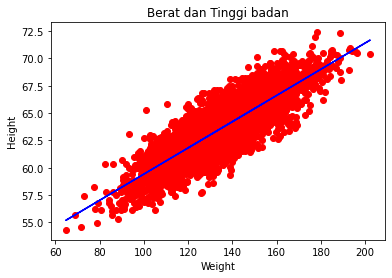

In [60]:
# Visualisasi hasil Training Set
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Berat dan Tinggi badan')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

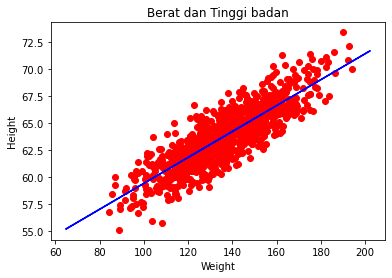

In [61]:
# Visualisasi hasil Test Set
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Berat dan Tinggi badan')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [62]:
prediksi = model.predict([[140]])
print(prediksi)

[64.21613481]
